Closing price at 2029 would be around  [890.14524428]
Your investments will have a CAGR of  [21.06920811] %


AttributeError: 'FigureCanvasAgg' object has no attribute 'set_window_title'

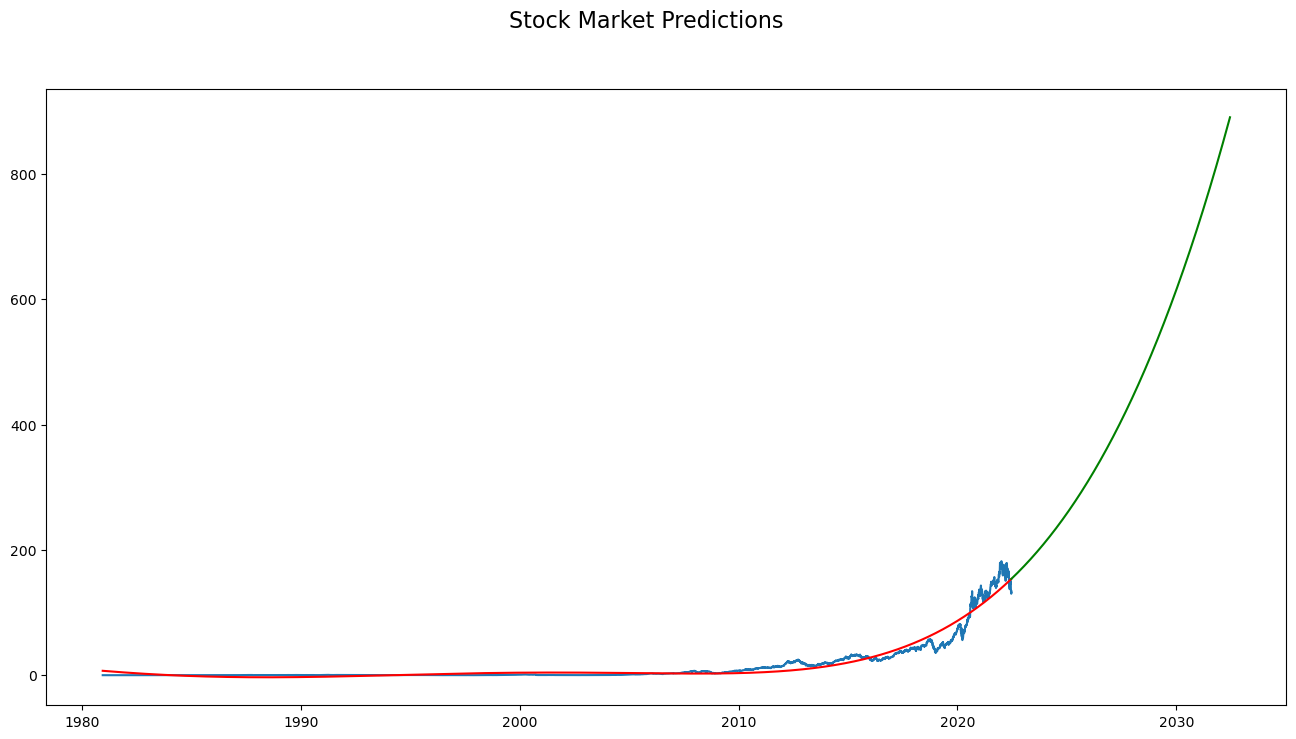

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

#for polynomial regression
from sklearn.preprocessing import PolynomialFeatures

#to plot within notebook
import matplotlib.pyplot as plt

#function to calculate compound annual growth rate
def CAGR(first, last, periods):
    return ((last/first)**(1/periods)-1) * 100

#Read the data file
df = pd.read_csv('/home/ailab/Downloads/archive (2)/AAPL.csv')

#Setting index as date
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']

#Converting dates into number of days as dates cannot be passed directly 
#to any regression model
df.index = (df.index - pd.to_datetime('1970-01-01')).days

#Convert the pandas series into numpy array, we need to further 
#massage it before sending it to regression model
y = np.asarray(df['Close'])
x = np.asarray(df.index.values)

#Model initialization
#by default the degree of the equation is 1.
#Hence the mathematical model equation is y = mx + c, 
#which is an equation of a line.
regression_model = LinearRegression()

#Choose the order of your polynomial. Here the degree is set to 5.
#hence the mathematical model equation is 
#y = c0 + c1.x**1 + c2.x**2+....+ c5.x**5
poly = PolynomialFeatures(5)

#Convert dimension x in the higher degree polynomial expression
X_transform = poly.fit_transform(x.reshape(-1, 1))

#Fit the data(train the model)
regression_model.fit(X_transform, y.reshape(-1, 1))

# Prediction for historical dates. Let's call it learned values.
y_learned = regression_model.predict(X_transform)

#Now, add future dates to the date index and pass that index to 
#the regression model for future prediction.
#As we have converted date index into a range index, hence, here we 
#just need to add 3650 days ( roughly 10 yrs)
#to the previous index. x[-1] gives the last value of the series.
newindex = np.asarray(pd.RangeIndex(start=x[-1], stop=x[-1] + 3650))

#Convert the extended dimension x in the higher degree polynomial expression
X_extended_transform = poly.fit_transform(newindex.reshape(-1, 1))

#Prediction for future dates. Let's call it predicted values.
y_predict = regression_model.predict(X_extended_transform)

#Print the last predicted value
print ("Closing price at 2029 would be around ", y_predict[-1])

#Convert the days index back to dates index for plotting the graph
x = pd.to_datetime(df.index, origin='1970-01-01', unit='D')
future_x = pd.to_datetime(newindex, origin='1970-01-01', unit='D')

#Print CAGR for next ten years.
print ('Your investments will have a CAGR of ',(CAGR(y[-1], y_predict[-1], 10)), '%')

#Setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#Plot the actual data
plt.figure(figsize=(16,8))
plt.plot(x,df['Close'], label='Close Price History')

#Plot the regression model
plt.plot(x,y_learned, color='r', label='Mathematical Model')

#Plot the future predictions
plt.plot(future_x,y_predict, color='g', label='Future Predictions')

#Set the title of the graph
plt.suptitle('Stock Market Predictions', fontsize=16)

#Set the title of the graph window
fig = plt.gcf()
fig.canvas.set_window_title('Stock Market Predictions')

#display the legends
plt.legend()
#display the graph
plt.show()